In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading Dataset

In [3]:
import pandas as pd

df = pd.read_csv("twitter_training.csv")
print(df.shape)
df.head(5)

(74681, 4)


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# Data Cleaning

In [4]:
df.drop(columns=["2401","Borderlands"] , inplace=True)

In [5]:
df.head()

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [6]:
df["Sentiment"] = df["Positive"]
df["tweet"] = df["im getting on borderlands and i will murder you all ,"]

In [7]:
df.head()

,Positive,"im getting on borderlands and i will murder you all ,",Sentiment,tweet
0,Positive,I am coming to the borders and I will kill you...,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...,Positive,im getting into borderlands and i can murder y...


In [8]:
df.drop(columns=["Positive","im getting on borderlands and i will murder you all ,"],inplace=True)

In [9]:
df.head()

,Sentiment,tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [10]:
df.shape

(74681, 2)

In [11]:
df.isnull().sum()

Sentiment      0
tweet        686
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Sentiment    0
tweet        0
dtype: int64

In [14]:
df["Sentiment"].value_counts()

Sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [15]:
# Removing rows to balance and also irrelevent sentiment is none of the use
df = df[df["Sentiment"]!='Irrelevant']

In [16]:
df["Sentiment"].value_counts()

Sentiment
Negative    22358
Positive    20654
Neutral     18108
Name: count, dtype: int64

In [17]:
# visualization of data

Text(0.5, 1.0, 'label distribution')

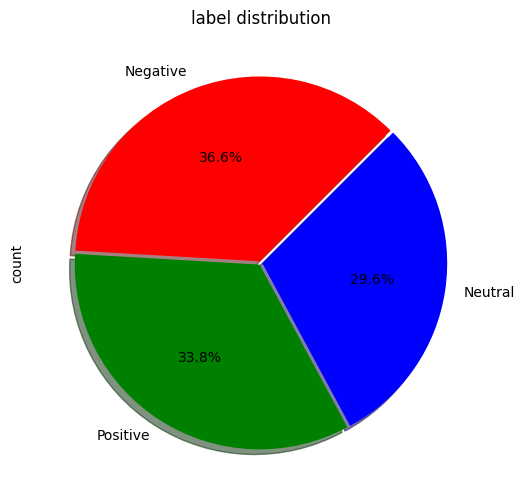

In [18]:
plt.figure(figsize = (10,6))
colors = ['red','green','blue']
df["Sentiment"].value_counts().plot(kind='pie',autopct = '%.1f%%',shadow = True,colors = colors,startangle = 45,explode=(0.01,0.01,0.01))
plt.title('label distribution')

# Encoding:

In [19]:
labels={
    'Negative':0,
    'Positive':1,
    'Neutral':2
}

In [20]:
df["label"] = df["Sentiment"].map(labels)

In [21]:
df.sample(7)

,Sentiment,tweet,label
42938,Negative,"""59 Chinese Apps Including . . *Le PUBG users...",0
65790,Neutral,Johnson & Johnson will no longer sell its talc...,2
55337,Positive,"@CallofDuty Sincerely as can be, thank you so ...",1
57416,Positive,[LIVE. ] Hitting the RhandlerR . . Shout out ...,1
39417,Neutral,9 Pleasant sensations if they spank me.,2
73408,Positive,"Fucking W, Glad a bought a little bit when all...",1
903,Positive,The Atleast I have Borderlands to come cheer m...,1


# Cleaning Text

In [22]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [23]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>','',text)
    text = re.sub('game','',text) #found this word in most common occurances and it is irrelevant(as it was most occuring in both positive and negative)
    text = re.sub('pic','',text) #found this word in most common occurances and it is irrelevant (as it was most occuring in both positive and negative)
    text = re.sub('like','',text) #found this word in most common occurances and it is irrelevant (as it was most occuring in both positive and negative)
    text = re.sub('com','',text) #found this word in most common occurances and it is irrelevant (as it was most occuring in both positive and negative)
    text = re.sub('play','',text) #found this word in most common occurances and it is irrelevant (as it was most occuring in both positive and negative)
    text = re.sub('twitter','',text) #found this word in most common occurances and it is irrelevant (as it was most occuring in both positive and negative)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]',' ',text.lower()) + ' '.join(emojis).replace('-', '')

    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

<>:2: SyntaxWarning: invalid escape sequence '\)'
<>:13: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\)'
<>:13: SyntaxWarning: invalid escape sequence '\W'
C:\Users\santo\AppData\Local\Temp\ipykernel_6816\2720176296.py:2: SyntaxWarning: invalid escape sequence '\)'
  emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(D|P)')
C:\Users\santo\AppData\Local\Temp\ipykernel_6816\2720176296.py:13: SyntaxWarning: invalid escape sequence '\W'
  text = re.sub('[\W+]',' ',text.lower()) + ' '.join(emojis).replace('-', '')


In [24]:
df['clean_tweet'] = df['tweet'].apply(lambda x:preprocessing(x))

In [25]:
df.sample(5)

,Sentiment,tweet,label,clean_tweet
45997,Neutral,Verizon demanded to stop misleading advertiser...,2,verizon demand stop mislead advertis 5g network
10830,Positive,Graphics Play Too Crazy,1,graphic play crazi
23577,Positive,... We're ready already for day [UNK] of @ISE_...,1,readi alreadi day unk ise_show big big thank e...
22047,Positive,S Loving the changes RhandlerR pic.twitter.com...,1,love chang rhandlerr jzt2hbm7pj
59230,Neutral,"A fired Facebook CEO wrote a scathing 6,600-wo...",2,fire facebook ceo wrote scath 6 600 word essay...


# Required Dataset:

In [26]:
dataset = df.drop(columns=["Sentiment","tweet"])

In [27]:
dataset.sample(5)

,label,clean_tweet
65479,2,break johnson johnson stop produc talc base ba...
38898,1,good stream tonight jump back arena coupl bad ...
30458,1,honor super sweet servic sirhaian
15422,2,say hello sasha hostyn aka scarlett current hi...
42650,0,man miss rhandlerr prime izoafew163


# Visualizing Positive, Negative and Neutral Words 

In [28]:
positivedata = dataset[dataset['label']==1]
positivedata = positivedata['clean_tweet']
negativedata = dataset[dataset['label']==0]
negativedata = negativedata['clean_tweet']
neutraldata = dataset[dataset['label']==2]
neutraldata = neutraldata['clean_tweet']

In [29]:
from collections import Counter

In [30]:
# Positive Words:
positive_words = ' '.join(positivedata).split()
positive_words_count = Counter(positive_words)
positive_common_words = positive_words_count.most_common(10)

In [31]:
# Negative Words:
negative_words = ' '.join(negativedata).split()
negative_words_count = Counter(negative_words)
negative_common_words = negative_words_count.most_common(10)

In [32]:
# Neutral Words:
neutral_words = ' '.join(neutraldata).split()
neutral_words_count = Counter(neutral_words)
neutral_common_words = neutral_words_count.most_common(10)

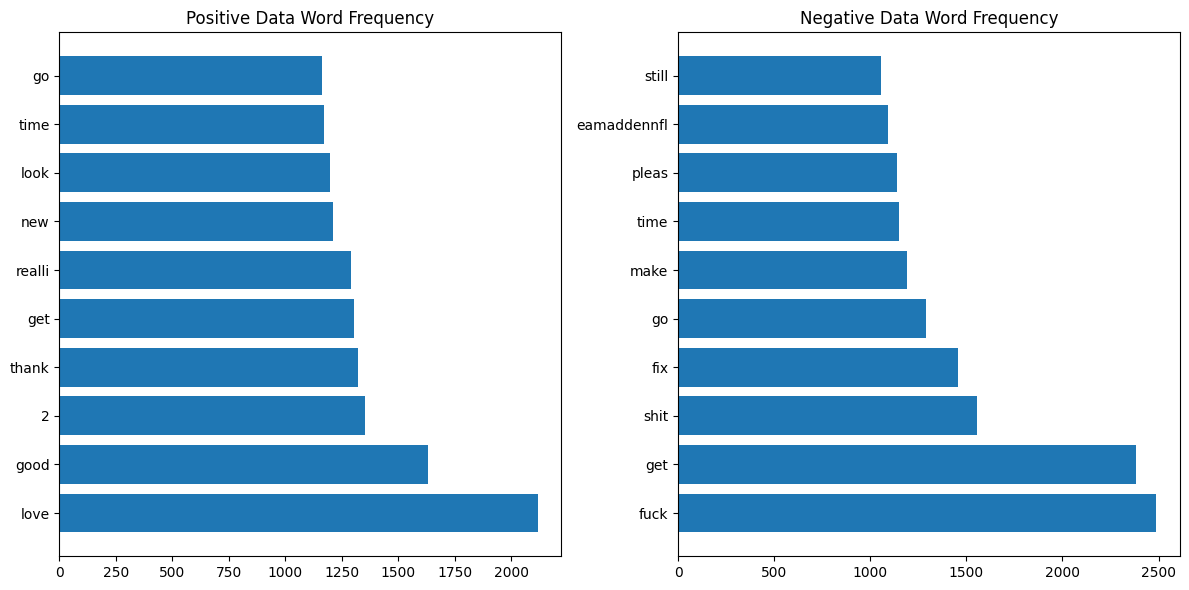

In [33]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positive_common_words)), [count for _, count in positive_common_words], align='center')
axes[0].set_yticks(range(len(positive_common_words)))
axes[0].set_yticklabels([word for word, _ in positive_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negative_common_words)), [count for _, count in negative_common_words], align='center')
axes[1].set_yticks(range(len(negative_common_words)))
axes[1].set_yticklabels([word for word, _ in negative_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()


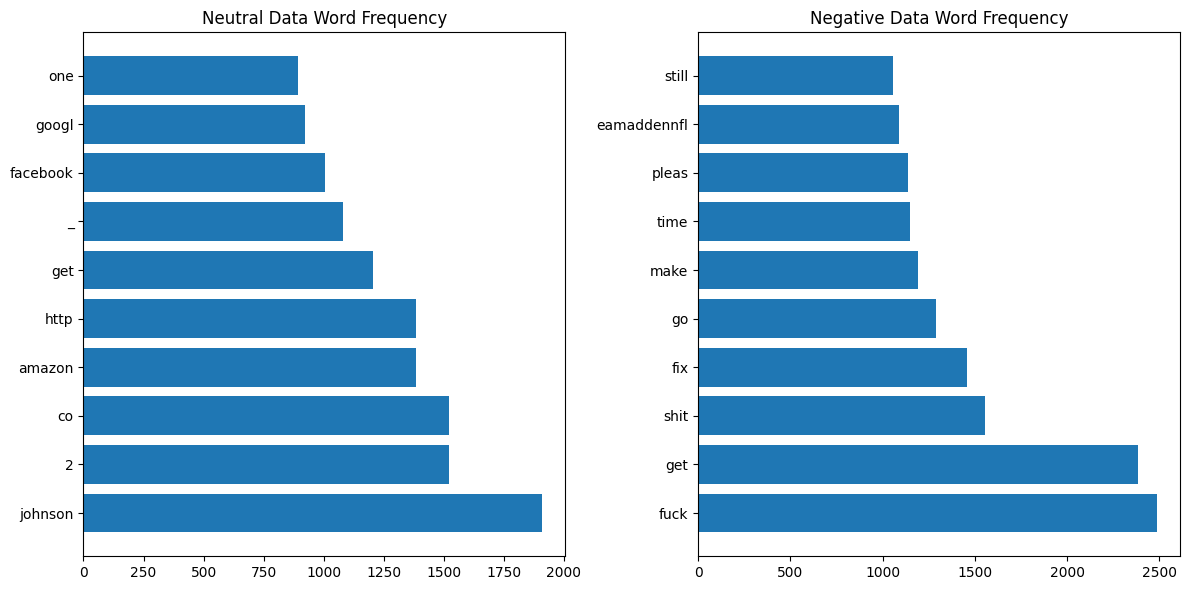

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Negative data word frequency
axes[1].barh(range(len(negative_common_words)), [count for _, count in negative_common_words], align='center')
axes[1].set_yticks(range(len(negative_common_words)))
axes[1].set_yticklabels([word for word, _ in negative_common_words])
axes[1].set_title('Negative Data Word Frequency')
# Neutral data word frequency
axes[0].barh(range(len(neutral_common_words)), [count for _, count in neutral_common_words], align='center')
axes[0].set_yticks(range(len(neutral_common_words)))
axes[0].set_yticklabels([word for word, _ in neutral_common_words])
axes[0].set_title('Neutral Data Word Frequency')

plt.tight_layout()
plt.show()


In [41]:
#  to get much better accuracy we can actually keep removing the most common which dont have any relation of being positive or negative 
#  we can keep removing untill we get the top 10 most occuring words are actually the positive and negetive words

# Vectorization

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,smooth_idf=True,norm='l2')
y = dataset.label.values
x = tfidf.fit_transform(dataset.clean_tweet)

# Model Building

In [43]:
# train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=46)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
# evaluation

In [46]:
y_pred = model.predict(x_test)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6814
           1       0.87      0.97      0.91      6077
           2       0.97      0.86      0.91      5445

    accuracy                           0.92     18336
   macro avg       0.92      0.91      0.92     18336
weighted avg       0.92      0.92      0.92     18336



In [50]:
y_test[:20]

array([1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1],
      dtype=int64)

In [51]:
y_pred[:20]

array([1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 2],
      dtype=int64)

# Prediction

In [67]:
def prediction(comment):
    processed_comment = preprocessing(comment)
    comment_list = [processed_comment] # wrapping in list
    comment_vector = tfidf.transform(comment_list)
    prediction = model.predict(comment_vector)[0]
    if prediction == 1:
        print("Positive")
    elif prediction ==2:
        print("Neutral")
    elif prediction==0:
        print("Negative")

    #return prediction

In [70]:
prediction("i had a wonderful day today :)")

Positive


In [77]:
prediction("i had bad day :)")

Neutral


In [78]:
prediction("worst day of this month :(")

Negative
